**FaceBook Analysis and Hypothesis**


I have never used facebook ever so i had to use the sources that my professor gave us incase we didnt have a facebook account. Im going to guess the most visited sites are Kent that being the school he taught at and maybe Twitter because of the useful information on there.

**Importing the stuff i need for the project**

In [184]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import json5 as js
import base64
import requests

**Grabbing the file that i need to import from facebook to see the data**


In [185]:
with open('your_off-facebook_activity.json') as data: facedf = json.load(data)

**Making a small dataframe to show what you visited**

In [186]:
facedf = pd.DataFrame(facedf['off_facebook_activity_v2'])
facedf

,name,events
0,Spotify: Spotify: Music and Podcasts,"[{'id': 174829003346, 'type': 'CUSTOM', 'times..."
1,cameo.com,"[{'id': 443618109326032, 'type': 'PAGE_VIEW', ..."
2,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ..."
3,Allstate,"[{'id': 2702763333090634, 'type': 'CUSTOM', 't..."
4,Bed Bath & Beyond,"[{'id': 346165315733088, 'type': 'PURCHASE', '..."
...,...,...
570,goodyear.com,"[{'id': 493663731138538, 'type': 'PAGE_VIEW', ..."
571,futurism.com,"[{'id': 286353685112848, 'type': 'PAGE_VIEW', ..."
572,flixlist.co,"[{'id': 687389134726121, 'type': 'PAGE_VIEW', ..."
573,freedomscientific.com,"[{'id': 2984607088284540, 'type': 'PAGE_VIEW',..."


**Counting each place you visited and how many times you did**

In [187]:
name_count = facedf.groupby(['name']).count()
name_count['events'] = [len(x) for x in facedf['name']]
name_count

,events
name,
2020census.gov,36
2k.com,9
500px.com,8
6abc.com,8
AT&T,17
...,...
yumpu.com,12
zdnet.com,12
zelda.com,11


**Showing the average ammount of times that you visited a certain place however many times you did**

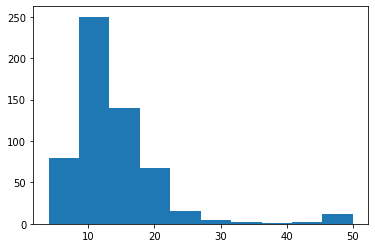

In [188]:
ax1, fig1 = plt.subplots()
fig1.hist(name_count['events'])
plt.show()

**Top 20 sites visited**

In [189]:
top = name_count.sort_values('events', ascending=False)
top[0:20]

,events
name,
menswearhouse.com,50
gapfactory.com,50
Spotify: Spotify: Music and Podcasts,50
Twitch: Livestream Multiplayer Games & Esports,50
medmutual.com,50
findlaw.com,49
"Hulu: Stream new TV shows, movies & series",49
aba.com,49
kff.org,48


**Plotting the top places that were visited on a bar graph so you can see which is highest**

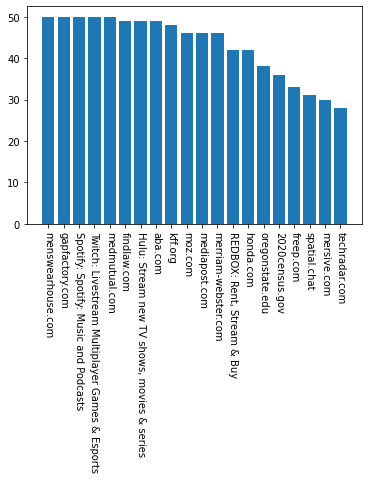

In [190]:
ax, fig = plt.subplots()
fig.bar(top.index[0:20], top['events'][0:20])
plt.xticks(rotation=270)
plt.show()

**Spotify Albums**

**Grabbing everything i need to start the spotify albums portion of the project. the Keys tokens and apis i need**

In [191]:
keys = pd.read_csv('spotify.txt', sep = ",", header = 0)
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid+":"+ appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header,data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization' : 'Bearer {}'.format(response.json()['access_token'])}

**Album IDS and Endpoints**

The Albums i chose were Melophobia by Cage The Elephant and Meteora By Linkin Park. They both are special to me Meteora being the first rock album i was ever introduced to by my dad and i instantly liked it, i still listen to it to this day. Melophobia is my favorite album of all time. I know ever song and there isnt a bad one on the album, its a no brainer to chose

In [192]:
Meteora = '4Gfnly5CzMJQqkUFfoHaP3'
Melophobia = '4EK8gtQfdVsmDTji7gBFlz'
Met_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(Meteora)
Met_tracks = requests.get(Met_endpoint, headers = session_header)
Mel_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(Melophobia)
Me_tracks = requests.get(Mel_endpoint, headers = session_header)

In [193]:
Met_dict = js.loads(Met_tracks.text)
Met_track_ids = [x['id'] for x in Met_dict['items']]
Mel_dict = js.loads(Mel_tracks.text)
Mel_track_ids = [x['id'] for x in Mel_dict['items']]

**Grabbing the audio features for each album from the spotify API**

In [194]:
Met_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in Met_track_ids))
Met_features = requests.get(Met_features_endpoint, headers = session_header)
Mel_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in Mel_track_ids))
Mel_features = requests.get(Mel_features_endpoint, headers = session_header)

In [196]:
Met_dict = js.loads(Met_features.text)
Mel_dict = js.loads(Mel_features.text)
Met_df = pd.DataFrame(Met_dict['audio_features'])
Mel_df = pd.DataFrame(Mel_dict['audio_features'])
Met_df['album'] = ['Meteora'] * len(Met_df.index)
Mel_df['album'] = ['Melophobia'] * len(Mel_df.index)

**Shows how much louder and energetic Linkin Park is than cage the elephant, i kind of expected this because Meteora is a rock album while Melophobia is more of an indi rock less loud**

Text(0.5, 1.0, 'Loudness')

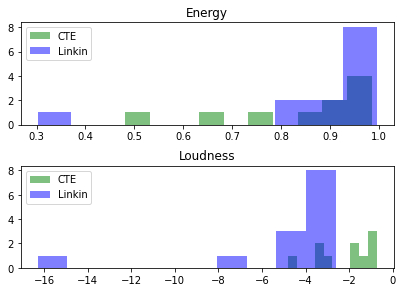

In [197]:
CTE = audio_features[audio_features['album'] == 'Melophobia']['energy']
Linkin = audio_features[audio_features['album'] == 'Meteora']['energy']
fig, ax = plt.subplots(2)
fig.tight_layout(h_pad=2.0)
ax[0].hist(CTE, alpha = 0.5, color = 'green', label='CTE')
ax[0].hist(Linkin, alpha = 0.5, color = 'blue', label='Linkin')
ax[0].legend()
ax[0].set_title('Energy')


CTE = audio_features[audio_features['album'] == 'Melophobia']['loudness']
Linkin = audio_features[audio_features['album'] == 'Meteora']['loudness']
ax[1].hist(CTE, alpha = 0.5, color = 'green', label='CTE')
ax[1].hist(Linkin, alpha = 0.5, color = 'blue', label='Linkin')
ax[1].legend()
ax[1].set_title('Loudness')


**Shows the coralation between how loud something is and the energy between the songs. The louder the song is the more energy is has. Spotify can use this to select songs to add to different playlist or recommendations for people**

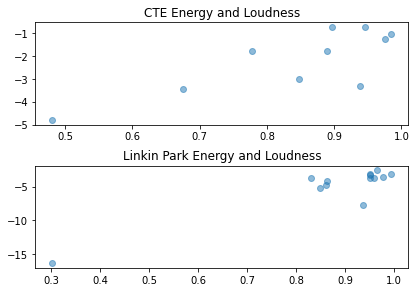

In [198]:
CTE_E = audio_features[audio_features['album'] == 'Melophobia']['energy']
Linkin_E = audio_features[audio_features['album'] == 'Meteora']['energy']
CTE_L = audio_features[audio_features['album'] == 'Melophobia']['loudness']
Linkin_L = audio_features[audio_features['album'] == 'Meteora']['loudness']
fig, ax = plt.subplots(2)
fig.tight_layout(h_pad=2.0)
ax[0].scatter(CTE_E, CTE_L, alpha = 0.5)
ax[0].set_title('CTE Energy and Loudness')
ax[1].scatter(Linkin_E, Linkin_L, alpha = 0.5)
ax[1].set_title('Linkin Park Energy and Loudness')
plt.show()

**Showing how similar the albums are in terms of getting people hyped**

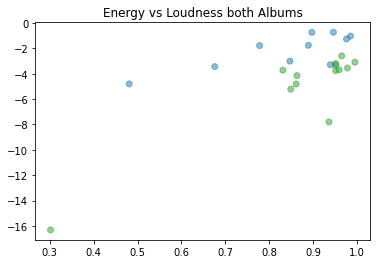

In [199]:
colors = {'Meteora':'tab:green', 'Melophobia':'tab:blue',}

fig, ax = plt.subplots()
ax.scatter(audio_features['energy'], audio_features['loudness'], c=audio_features['album'].map(colors), alpha = 0.5)
ax.set_title('Energy vs Loudness both Albums')

plt.show()

**Averaging out the danceability of each album with melophobia having a very broad danceible album and Meteoras songs being condensed and the same rating with danceibility**

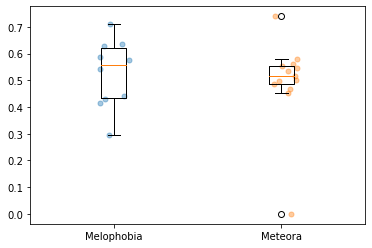

In [200]:
import numpy as np
fig, ax = plt.subplots()

CTE_D = audio_features[audio_features['album'] == 'Melophobia']['danceability']
Linkin_D = audio_features[audio_features['album'] == 'Meteora']['danceability']
CTE_x = [1] * len(CTE_D)
Linkin_x = [2] * len(Linkin_D)
CTE_x_jitter = np.random.uniform(-0.10, .10, len(CTE_x))
Linkin_x_jitter = np.random.uniform(-0.10, .10, len(Linkin_x))
ax.scatter(CTE_x + CTE_x_jitter, CTE_D, alpha = 0.4, s = 25)
ax.scatter(Linkin_x + Linkin_x_jitter, Linkin_D, alpha = 0.4, s = 25)
ax.boxplot([CTE_D, Linkin_D])
ax.set_xticks([1,2], ['Melophobia', 'Meteora'])
plt.show()


In [201]:
from scipy.stats import ttest_ind

ttest = ttest_ind(CTE_D, Linkin_D)
print("Cage The Elephant vs Linkin Park: \n T-stat : {}\n P-val : {} \n".format(ttest.statistic, ttest.pvalue))

Cage The Elephant vs Linkin Park: 
 T-stat : 0.49953552620387487
 P-val : 0.6225956261726016 



Shows that the albums arent that much different from each other. I expected that because they are both rock albums while linkin park is a harder rock band and cage the elephant is a softer rock band. Both rock albums tho hence why they are relatively similar